## Initializing the data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator
# see all columns
pd.set_option('display.max_columns', None)
# set seaborn style to white
sns.set_style('whitegrid')
# set seaborn font to sans-serif
sns.set(font='sans-serif')
# set seaborn font scale to 1.25
sns.set(font_scale=1.15)


In [3]:
#sn  = pd.read_excel('../data/raw/DriveNow/DTU - data til case_LTMZones1.xlsx')



In [4]:
# save sn to pickle
#sn.to_pickle('../data/processed/sn.pkl')


In [5]:
# load sn from pickle
sn = pd.read_pickle('../data/processed/sn.pkl')

In [6]:
# drop columns TurID
sn.drop(columns=['TurID'], inplace=True)

In [7]:
sn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366420 entries, 0 to 366419
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   BilID                  366420 non-null  object        
 1   PersonID               366420 non-null  int64         
 2   Latitude (Start)       366420 non-null  object        
 3   Longitude (Start)      366420 non-null  object        
 4   Latitude (Slut)        366420 non-null  object        
 5   Longitude (Slut)       366420 non-null  object        
 6   Reservationstidspunkt  366420 non-null  datetime64[ns]
 7   Start tidspunkt        366420 non-null  datetime64[ns]
 8   Slut tidspunkt         366420 non-null  datetime64[ns]
 9   Alder                  366420 non-null  int64         
 10  Køn                    366420 non-null  object        
 11  Batteristatus (start)  366420 non-null  object        
 12  Batteristatus (slut)   366420 non-null  obje

In [8]:
# replace dataframe columns to english names 
sn.rename(columns={"Latitude (Start)": "LatitudeStart", "Longitude (Start)": "LongitudeStart", 'Latitude (Slut)': "LatitudeEnd", 
                   'Longitude (Slut)':'LongitudeEnd', 'Reservationstidspunkt': "ReservationTime",
                    'Start tidspunkt': "StartTime", 'Slut tidspunkt': "EndTime", 'Alder': "Age", 'Køn': "Gender",
       'Batteristatus (start)': "BatteryStart", 'Batteristatus (slut)':"BatteryEnd", 'Km kørt': "KmDriven"}, inplace=True)


In [9]:
sn.head()

,BilID,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,Gender,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID
0,WBY1Z21040V307905,32614,55.670268,12.586064,55.652954,12.544699,2017-08-16 14:40:29,2017-08-16 14:34:29,2017-08-16 14:52:55,32,M,94,91,5,103142,102851
1,WBY1Z21040V308214,44363,55.687024,12.585952,55.726655,12.553914,2017-08-16 14:42:00,2017-08-16 14:38:00,2017-08-16 15:05:22,25,M,48,42,7,102212,157231
2,WBY1Z21070V307929,38610,55.692382,12.583143,55.775655,12.513962,2017-07-31 07:28:38,2017-07-31 07:21:38,2017-08-01 12:49:44,21,M,0,0,19,102213,173051
3,WBY1Z21040V307869,37425,55.630274,12.648864,55.706866,12.587122,2017-07-31 20:31:07,2017-07-31 20:31:07,2017-08-01 09:13:25,30,M,0,0,18,185203,102341
4,WBY1Z21030V307877,24168,55.693602,12.53821,55.677484,12.489247,2017-07-31 20:48:30,2017-07-31 20:44:30,2017-08-01 08:52:43,28,M,0,0,5,102454,102771


In [10]:
# drop rows where KmDriven = 0 
sn = sn[~sn["KmDriven"].isin([0])]
# drop rows where batteryStart <3
sn = sn[~sn["BatteryStart"].isin(['-', -1, 0, 1, 2, 3])]


In [11]:
# create TripDuration column 
sn['TripDuration'] = sn['EndTime'] - sn['StartTime']


In [12]:
sn.head()

,BilID,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,Gender,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration
0,WBY1Z21040V307905,32614,55.670268,12.586064,55.652954,12.544699,2017-08-16 14:40:29,2017-08-16 14:34:29,2017-08-16 14:52:55,32,M,94,91,5,103142,102851,0 days 00:18:26
1,WBY1Z21040V308214,44363,55.687024,12.585952,55.726655,12.553914,2017-08-16 14:42:00,2017-08-16 14:38:00,2017-08-16 15:05:22,25,M,48,42,7,102212,157231,0 days 00:27:22
799,WBY1Z210X0V308265,39704,55.672866,12.597133,55.669174,12.54044,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:22:39,23,M,41,9,28,103142,102821,0 days 16:00:40
1072,WBY1Z21010V308302,43260,55.691921,12.563013,55.681266,12.518947,2017-08-02 00:53:49,2017-08-02 00:53:49,2017-08-02 15:02:31,23,M,59,53,5,102441,147233,0 days 14:08:42
1248,WBY1Z210X0V308041,40964,55.683683,12.581574,55.695163,12.460236,2017-08-02 09:36:51,2017-08-02 09:31:51,2017-08-02 12:37:15,45,M,73,46,29,102231,175041,0 days 03:05:24


In [13]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355337 entries, 0 to 366418
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   BilID            355337 non-null  object         
 1   PersonID         355337 non-null  int64          
 2   LatitudeStart    355337 non-null  object         
 3   LongitudeStart   355337 non-null  object         
 4   LatitudeEnd      355337 non-null  object         
 5   LongitudeEnd     355337 non-null  object         
 6   ReservationTime  355337 non-null  datetime64[ns] 
 7   StartTime        355337 non-null  datetime64[ns] 
 8   EndTime          355337 non-null  datetime64[ns] 
 9   Age              355337 non-null  int64          
 10  Gender           355337 non-null  object         
 11  BatteryStart     355337 non-null  object         
 12  BatteryEnd       355337 non-null  object         
 13  KmDriven         355337 non-null  int64          
 14  FromZoneI

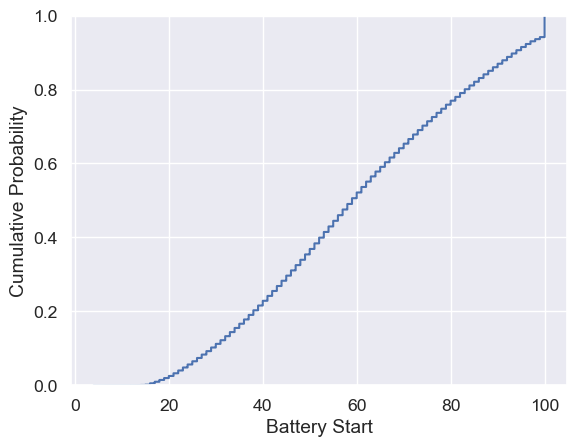

In [14]:
sns.ecdfplot(data = sn, x= "BatteryStart")
plt.xlabel('Battery Start')
plt.ylabel('Cumulative Probability')
plt.show()




In [15]:
# create Month column
sn['Month'] = pd.DatetimeIndex(sn['StartTime']).month.astype('category')

# Extracting 'Weekday' and 'StartHour' for further analysis
sn['Weekday'] = sn['StartTime'].dt.day_name().astype('category')
sn['StartHour'] = sn['StartTime'].dt.hour.astype('category')

# convert columns to appropriate data types
sn[['Gender', 'LatitudeStart', 'LongitudeStart', 'LatitudeEnd', 'LongitudeEnd']] = sn[['Gender', 'LatitudeStart', 'LongitudeStart', 'LatitudeEnd', 'LongitudeEnd']].astype('category')
sn[['Age', 'BatteryStart', 'BatteryEnd', 'KmDriven']] = sn[['Age', 'BatteryStart', 'BatteryEnd', 'KmDriven']].astype('int32')



In [16]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355337 entries, 0 to 366418
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   BilID            355337 non-null  object         
 1   PersonID         355337 non-null  int64          
 2   LatitudeStart    355337 non-null  category       
 3   LongitudeStart   355337 non-null  category       
 4   LatitudeEnd      355337 non-null  category       
 5   LongitudeEnd     355337 non-null  category       
 6   ReservationTime  355337 non-null  datetime64[ns] 
 7   StartTime        355337 non-null  datetime64[ns] 
 8   EndTime          355337 non-null  datetime64[ns] 
 9   Age              355337 non-null  int32          
 10  Gender           355337 non-null  category       
 11  BatteryStart     355337 non-null  int32          
 12  BatteryEnd       355337 non-null  int32          
 13  KmDriven         355337 non-null  int32          
 14  FromZoneI

In [17]:
sn.to_pickle('../data/processed/sn_clean.pkl')

In [18]:
# save to csv
#sn.to_csv('../data/processed/sn_clean.csv', index=False)

In [19]:
# save sn to parquet
#sn.to_parquet('../data/processed/sn_clean.parquet')


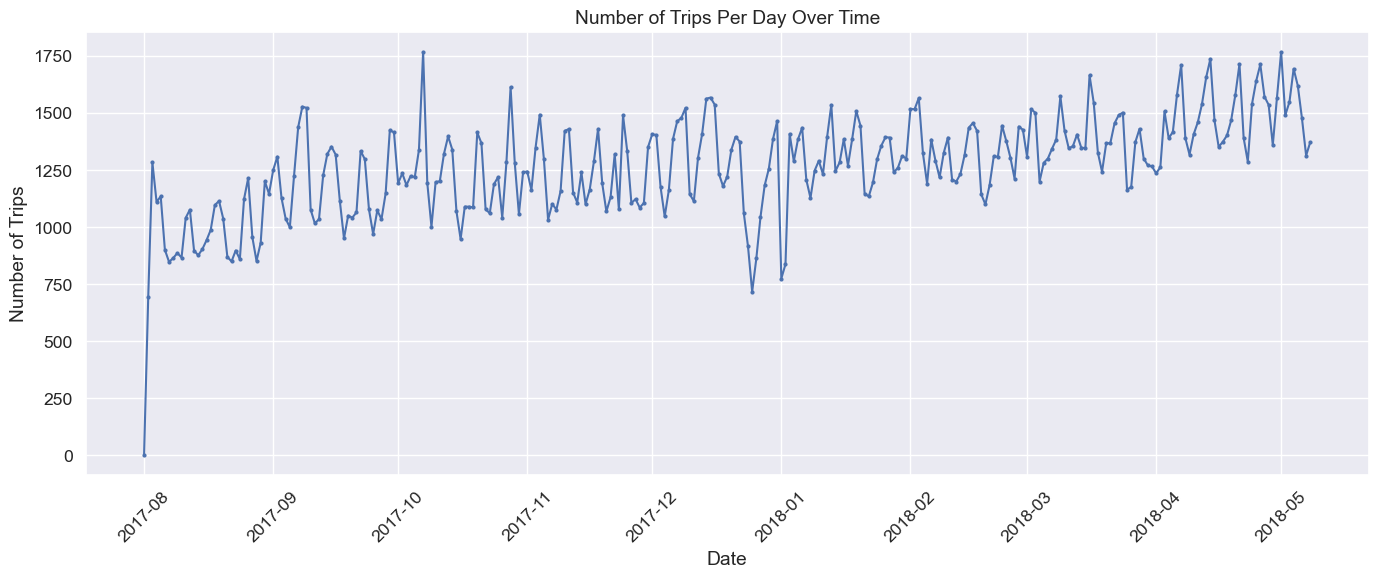

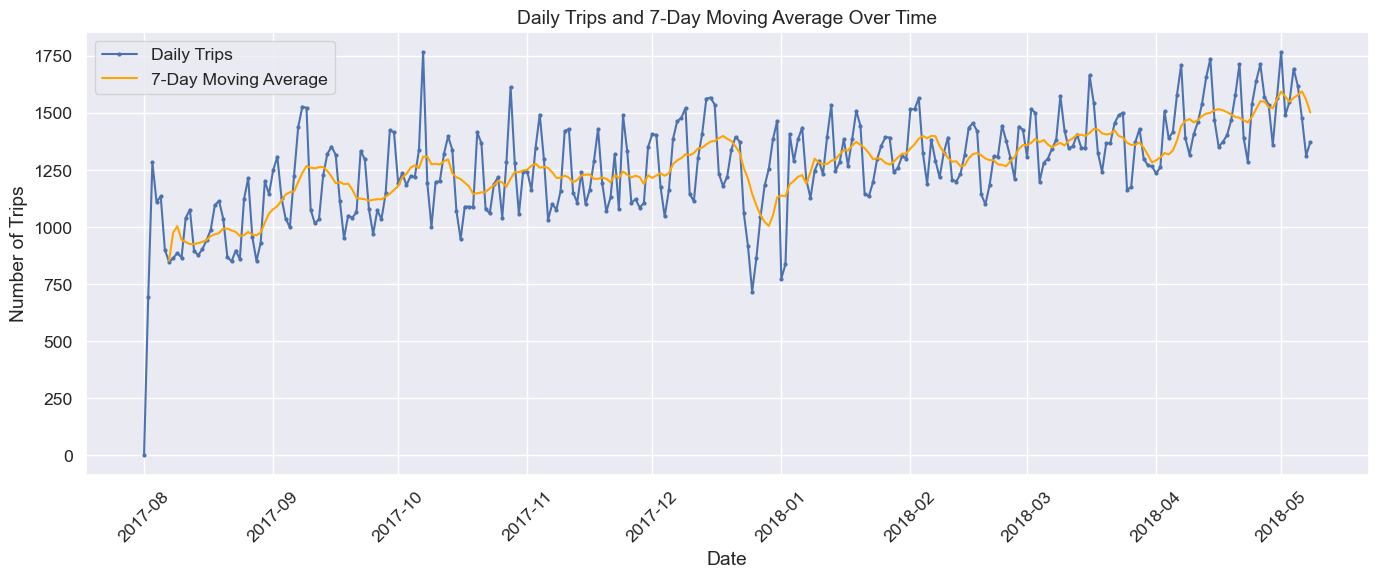

In [20]:

# Creating a copy of the dataset with 'tripStart' as the index for timeseries analysis
ts_data = sn.copy()
ts_data.set_index('StartTime', inplace=True)

# Resampling 'tripStart' to daily frequency and counting the number of trips
daily_trips = ts_data.resample('D').size()

# Visualizing the number of trips per day over time
plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, marker='o', linestyle='-', markersize=2)
plt.title('Number of Trips Per Day Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating and visualizing the 7-day moving average of trips per day
moving_avg = daily_trips.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, label='Daily Trips', marker='o', linestyle='-', markersize=2)
plt.plot(moving_avg.index, moving_avg.values, label='7-Day Moving Average', linestyle='-', color='orange')
plt.title('Daily Trips and 7-Day Moving Average Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

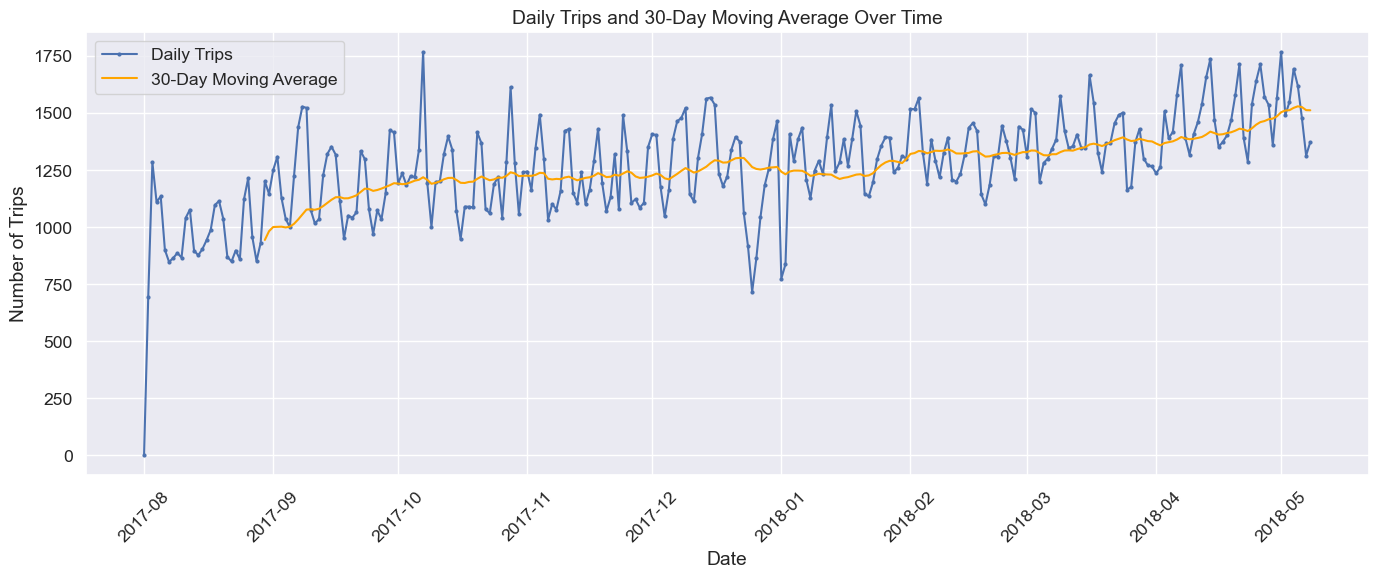

In [21]:
# Calculating and visualizing the 30-day moving average of trips per day
moving_avg = daily_trips.rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_trips.index, daily_trips.values, label='Daily Trips', marker='o', linestyle='-', markersize=2)
plt.plot(moving_avg.index, moving_avg.values, label='30-Day Moving Average', linestyle='-', color='orange')
plt.title('Daily Trips and 30-Day Moving Average Over Time')
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
daily_trips[daily_trips>1700]

StartTime
2017-10-07    1767
2018-04-07    1710
2018-04-14    1736
2018-04-21    1714
2018-04-26    1712
2018-05-01    1767
dtype: int64

In [23]:
sn.describe()

,PersonID,ReservationTime,StartTime,EndTime,Age,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration
count,355337.000000,355337,355337,355337,355337.000000,355337.000000,355337.000000,355337.000000,355337.000000,355337.000000,355337
mean,33078.579115,2017-12-28 03:58:01.703495680,2017-12-28 03:49:06.942521600,2017-12-28 04:24:12.753958144,33.119033,60.280334,50.717752,7.971528,114887.932712,114999.132142,0 days 00:35:05.811435341
min,2.000000,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:11:25,18.000000,4.000000,-1.000000,-19183.000000,0.000000,0.000000,-1 days +23:24:41
25%,22673.000000,2017-10-20 15:19:59,2017-10-20 15:14:31,2017-10-20 15:48:05,26.000000,42.000000,32.000000,4.000000,102421.000000,102422.000000,0 days 00:17:40
50%,36125.000000,2017-12-31 08:31:31,2017-12-31 08:24:31,2017-12-31 08:59:28,31.000000,59.000000,50.000000,6.000000,102771.000000,102771.000000,0 days 00:24:41
75%,45603.000000,2018-03-08 19:22:53,2018-03-08 19:15:20,2018-03-08 19:47:04,39.000000,79.000000,69.000000,10.000000,103252.000000,103252.000000,0 days 00:34:21
max,59197.000000,2018-05-08 23:48:11,2018-05-08 23:47:11,2018-05-08 23:56:41,89.000000,100.000000,100.000000,16328.000000,316143.000000,370146.000000,6 days 00:07:45
std,15312.620343,NaN,NaN,NaN,9.585995,23.007852,23.912056,95.349674,24650.677348,24805.857504,0 days 01:02:36.000161444
